<div style="margin-bottom: 32px;">
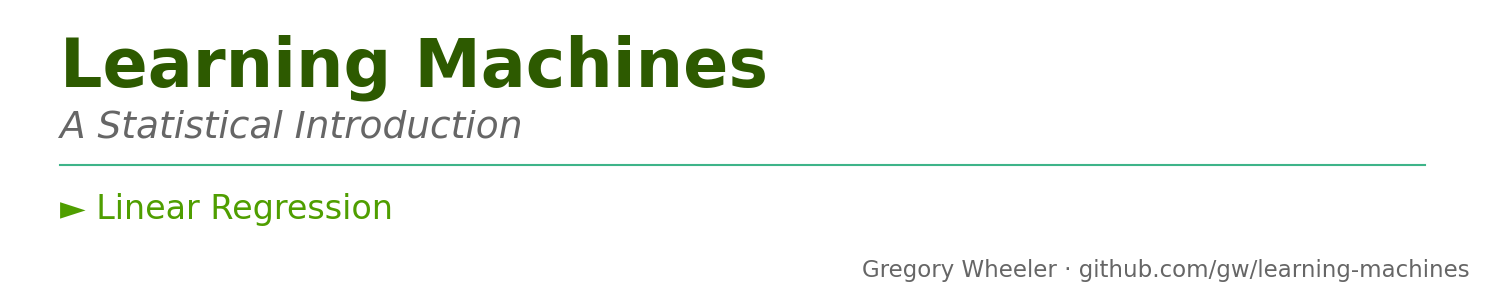
</div>


# Linear Regression: The Closed-Form Solution

This notebook demonstrates the ordinary least squares (OLS) closed-form solution for linear regression, connecting the matrix formulation in Chapter 2 to concrete computation.

**What computation adds**: The closed-form solution is a single equation in the text—here we unpack it step by step, watching each matrix multiplication in action. Seeing $\mathbf{X}^\top\mathbf{X}$, its inverse, and the final projection demystifies what "solving" a regression actually means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlone_theme as mt

mt.set_notebook_mode()
np.set_printoptions(precision=4, suppress=True)

## 1. The Normal Equations

For a linear model $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$, the OLS estimator minimizes the residual sum of squares:

$$\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2$$

Taking the derivative and setting it to zero yields the **normal equations**:

$$\mathbf{X}^\top \mathbf{X} \hat{\boldsymbol{\beta}} = \mathbf{X}^\top \mathbf{y}$$

When $\mathbf{X}^\top \mathbf{X}$ is invertible, we get the closed-form solution:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$

In [2]:
def ols_closed_form(X, y):
    """Compute OLS coefficients using the normal equations."""
    XtX = X.T @ X
    Xty = X.T @ y
    beta = np.linalg.inv(XtX) @ Xty
    return beta

## 2. A Small Worked Example

Consider a simple dataset with 5 observations. We'll compute everything step-by-step to see the matrix operations in action.

In [3]:
# Simple dataset: house size (hundreds of sq ft) vs price (thousands of $)
x = np.array([8, 10, 12, 14, 16])     # Feature
y = np.array([175, 200, 255, 262, 330])  # Target

print("Feature (x):  ", x)
print("Target  (y):  ", y)

Feature (x):   [ 8 10 12 14 16]
Target  (y):   [175 200 255 262 330]


In [4]:
# Build the design matrix with intercept column
X = np.column_stack([np.ones(len(x)), x])
print("Design matrix X:")
print(X)

Design matrix X:
[[ 1.  8.]
 [ 1. 10.]
 [ 1. 12.]
 [ 1. 14.]
 [ 1. 16.]]


The design matrix has a column of ones for the intercept term. Now let's compute each component of the normal equations.

In [5]:
# Step 1: Compute X^T X
XtX = X.T @ X
print("X^T X:")
print(XtX)

X^T X:
[[  5.  60.]
 [ 60. 760.]]


In [6]:
# Step 2: Compute X^T y
Xty = X.T @ y
print("X^T y:")
print(Xty)

X^T y:
[ 1222. 15408.]


In [7]:
# Step 3: Compute (X^T X)^{-1}
XtX_inv = np.linalg.inv(XtX)
print("(X^T X)^{-1}:")
print(XtX_inv)

(X^T X)^{-1}:
[[ 3.8   -0.3  ]
 [-0.3    0.025]]


In [8]:
# Step 4: Compute beta = (X^T X)^{-1} X^T y
beta = XtX_inv @ Xty
print(f"Estimated coefficients: beta_0 = {beta[0]:.2f}, beta_1 = {beta[1]:.2f}")
print(f"\nInterpretation: Price = {beta[0]:.0f} + {beta[1]:.1f} × Size")

Estimated coefficients: beta_0 = 21.20, beta_1 = 18.60

Interpretation: Price = 21 + 18.6 × Size


## 3. Visualization

In [9]:
# Predictions
y_pred = X @ beta
residuals = y - y_pred

print("Actual:     ", y)
print("Predicted:  ", y_pred.round(1))
print("Residuals:  ", residuals.round(1))

Actual:      [175 200 255 262 330]
Predicted:   [170.  207.2 244.4 281.6 318.8]
Residuals:   [  5.   -7.2  10.6 -19.6  11.2]


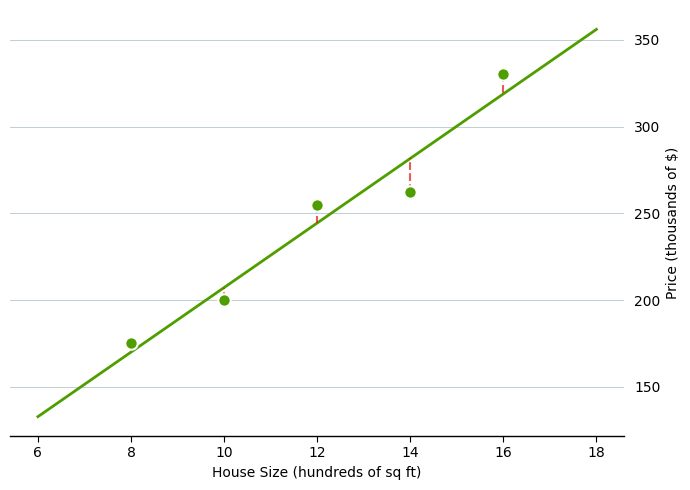

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

# Data points
mt.scatter_with_border(ax, x, y, color=mt.GREEN, size=80)

# Regression line
x_line = np.linspace(6, 18, 100)
y_line = beta[0] + beta[1] * x_line
ax.plot(x_line, y_line, color=mt.GREEN, linewidth=2, label='OLS fit')

# Show residuals as vertical lines
for xi, yi, ypi in zip(x, y, y_pred):
    ax.plot([xi, xi], [yi, ypi], color=mt.RED, linewidth=1.5, linestyle='--', alpha=0.7)

ax.set_xlabel('House Size (hundreds of sq ft)')
ax.set_ylabel('Price (thousands of $)')
mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

The dashed red lines show the residuals—the vertical distances that OLS minimizes in aggregate.

## 4. The Geometric View: Projection

The OLS solution projects the target vector $\mathbf{y}$ onto the column space of $\mathbf{X}$. The fitted values $\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$ are the closest point to $\mathbf{y}$ in this subspace.

The **hat matrix** $\mathbf{H} = \mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top$ performs this projection:

In [11]:
# Hat matrix
H = X @ np.linalg.inv(X.T @ X) @ X.T
print("Hat matrix H (5×5):")
print(H.round(3))

Hat matrix H (5×5):
[[ 0.6  0.4  0.2  0.  -0.2]
 [ 0.4  0.3  0.2  0.1  0. ]
 [ 0.2  0.2  0.2  0.2  0.2]
 [ 0.   0.1  0.2  0.3  0.4]
 [-0.2  0.   0.2  0.4  0.6]]


In [12]:
# Verify: H @ y gives fitted values
y_hat_via_H = H @ y
print("Fitted values via H @ y:  ", y_hat_via_H.round(1))
print("Fitted values via X @ β:  ", y_pred.round(1))

Fitted values via H @ y:   [170.  207.2 244.4 281.6 318.8]
Fitted values via X @ β:   [170.  207.2 244.4 281.6 318.8]


## 5. Connecting to scikit-learn

Of course, in practice we use library implementations. Let's verify that sklearn's `LinearRegression` gives the same result.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)  # sklearn expects 2D input

print(f"sklearn intercept: {model.intercept_:.2f}")
print(f"sklearn slope:     {model.coef_[0]:.2f}")
print(f"\nOur intercept:     {beta[0]:.2f}")
print(f"Our slope:         {beta[1]:.2f}")

sklearn intercept: 21.20
sklearn slope:     18.60

Our intercept:     21.20
Our slope:         18.60


## 6. Multiple Regression

The same formulation extends to multiple features. Let's add a second feature: number of bedrooms.

In [14]:
# Extended dataset with two features
np.random.seed(42)
n = 50

size = np.random.uniform(8, 20, n)       # House size
bedrooms = np.random.randint(2, 5, n)    # Number of bedrooms

# True relationship: Price = 20 + 15*size + 25*bedrooms + noise
price = 20 + 15 * size + 25 * bedrooms + np.random.normal(0, 15, n)

print(f"Generated {n} observations with 2 features")

Generated 50 observations with 2 features


In [15]:
# Design matrix with intercept
X_multi = np.column_stack([np.ones(n), size, bedrooms])
print(f"Design matrix shape: {X_multi.shape}")
print("\nFirst 5 rows:")
print(X_multi[:5])

Design matrix shape: (50, 3)

First 5 rows:
[[ 1.     12.4945  4.    ]
 [ 1.     19.4086  3.    ]
 [ 1.     16.7839  3.    ]
 [ 1.     15.1839  3.    ]
 [ 1.      9.8722  3.    ]]


In [16]:
# OLS solution
beta_multi = ols_closed_form(X_multi, price)

print("Estimated coefficients:")
print(f"  Intercept:       {beta_multi[0]:.2f} (true: 20)")
print(f"  Size effect:     {beta_multi[1]:.2f} (true: 15)")
print(f"  Bedroom effect:  {beta_multi[2]:.2f} (true: 25)")

Estimated coefficients:
  Intercept:       15.21 (true: 20)
  Size effect:     14.44 (true: 15)
  Bedroom effect:  29.18 (true: 25)


In [17]:
# Verify with sklearn
X_sklearn = np.column_stack([size, bedrooms])
model_multi = LinearRegression().fit(X_sklearn, price)

print("\nsklearn coefficients:")
print(f"  Intercept:       {model_multi.intercept_:.2f}")
print(f"  Size effect:     {model_multi.coef_[0]:.2f}")
print(f"  Bedroom effect:  {model_multi.coef_[1]:.2f}")


sklearn coefficients:
  Intercept:       15.21
  Size effect:     14.44
  Bedroom effect:  29.18


## 7. Residual Analysis

Examining residuals helps verify model assumptions: they should be roughly normally distributed with constant variance.

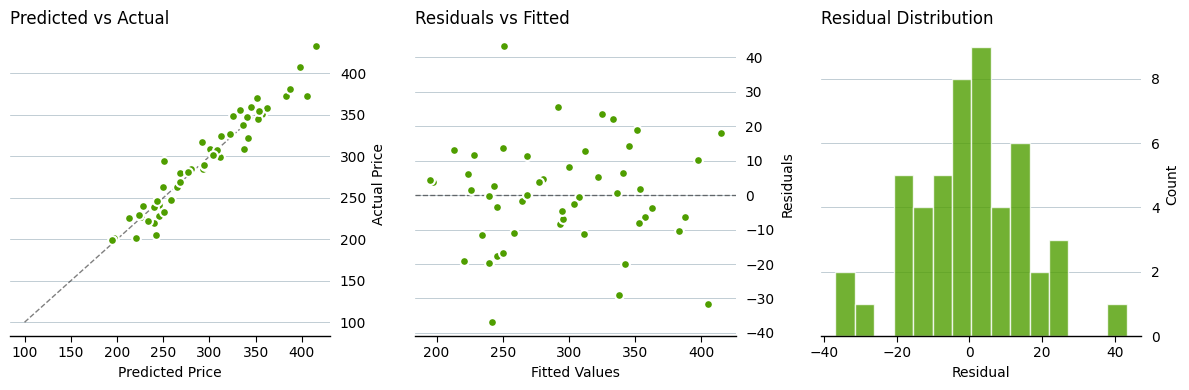

In [18]:
# Compute residuals for multiple regression
y_pred_multi = X_multi @ beta_multi
residuals_multi = price - y_pred_multi

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 1. Predicted vs Actual
ax = axes[0]
mt.scatter_with_border(ax, y_pred_multi, price, color=mt.GREEN, size=40)
ax.plot([100, 350], [100, 350], 'k--', alpha=0.5, linewidth=1)
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Actual Price')
mt.apply_economist_style(ax)
ax.set_title('Predicted vs Actual', fontsize=12, loc='left')

# 2. Residuals vs Fitted
ax = axes[1]
mt.scatter_with_border(ax, y_pred_multi, residuals_multi, color=mt.GREEN, size=40)
ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
mt.apply_economist_style(ax)
ax.set_title('Residuals vs Fitted', fontsize=12, loc='left')

# 3. Histogram of residuals
ax = axes[2]
ax.hist(residuals_multi, bins=15, color=mt.GREEN, edgecolor='white', alpha=0.8)
ax.set_xlabel('Residual')
ax.set_ylabel('Count')
mt.apply_economist_style(ax)
ax.set_title('Residual Distribution', fontsize=12, loc='left')

plt.tight_layout()
plt.show()

The residuals show no obvious pattern against fitted values (good—constant variance) and are roughly symmetric around zero (good—no systematic bias).

## 8. Numerical Stability: Using `lstsq`

Computing $(\mathbf{X}^\top\mathbf{X})^{-1}$ directly can be numerically unstable for ill-conditioned matrices. NumPy's `lstsq` uses the more stable SVD-based approach.

With well-conditioned data, both methods give identical results:

In [19]:
# Using numpy's lstsq (more numerically stable)
beta_lstsq, residuals_lstsq, rank, singular_values = np.linalg.lstsq(X_multi, price, rcond=None)

print("Coefficients via lstsq:")
print(f"  Intercept:       {beta_lstsq[0]:.4f}")
print(f"  Size effect:     {beta_lstsq[1]:.4f}")
print(f"  Bedroom effect:  {beta_lstsq[2]:.4f}")

print(f"\nDifference from closed-form: {np.max(np.abs(beta_lstsq - beta_multi)):.2e}")
print("(This is just floating-point precision—both methods agree)")

Coefficients via lstsq:
  Intercept:       15.2142
  Size effect:     14.4410
  Bedroom effect:  29.1801

Difference from closed-form: 1.97e-12
(This is just floating-point precision—both methods agree)


### When numerical stability matters

The difference becomes significant with **ill-conditioned** matrices—those where $(\mathbf{X}^\top\mathbf{X})$ is nearly singular. This commonly happens with **near-collinear features**: variables that are almost linear combinations of each other.

The **condition number** of a matrix measures how sensitive its inverse is to small perturbations. A large condition number (say, > 10⁶) signals potential numerical trouble.

In [20]:
# Create near-collinear features
np.random.seed(42)
n = 100
x1 = np.random.randn(n)
x2 = x1 + np.random.randn(n) * 1e-8  # x2 ≈ x1 (correlation > 0.9999999)
y = 3*x1 + 2*x2 + np.random.randn(n) * 0.1  # True: β1=3, β2=2, so β1+β2=5

# Build design matrix
X_collinear = np.column_stack([np.ones(n), x1, x2])

# Check condition number
cond_number = np.linalg.cond(X_collinear.T @ X_collinear)
print(f"Condition number of X'X: {cond_number:.2e}")
print("(Compare to ~10 for the well-conditioned housing data above)\n")

# Method 1: Closed-form via matrix inverse
XtX_inv = np.linalg.inv(X_collinear.T @ X_collinear)
beta_closed = XtX_inv @ X_collinear.T @ y

# Method 2: lstsq via SVD
beta_lstsq, *_ = np.linalg.lstsq(X_collinear, y, rcond=None)

print("Individual coefficients (true: β1=3, β2=2):")
print(f"  Closed-form: β1={beta_closed[1]:12.2f}, β2={beta_closed[2]:12.2f}")
print(f"  lstsq:       β1={beta_lstsq[1]:12.2f}, β2={beta_lstsq[2]:12.2f}")
print("  (Both are wildly off—the problem is ill-posed)\n")

print("But the sum β1 + β2 should be ~5:")
print(f"  Closed-form: {beta_closed[1] + beta_closed[2]:.2f}")
print(f"  lstsq:       {beta_lstsq[1] + beta_lstsq[2]:.2f}")
print("  (lstsq preserves meaningful structure despite ill-conditioning)")

Condition number of X'X: 4.74e+15
(Compare to ~10 for the well-conditioned housing data above)

Individual coefficients (true: β1=3, β2=2):
  Closed-form: β1=   -16693.22, β2=    16698.90
  lstsq:       β1=   122770.81, β2=  -122765.79
  (Both are wildly off—the problem is ill-posed)

But the sum β1 + β2 should be ~5:
  Closed-form: 5.68
  lstsq:       5.02
  (lstsq preserves meaningful structure despite ill-conditioning)


## Summary

The closed-form OLS solution $\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{y}$ provides:

- **Direct computation** of optimal coefficients (no iteration)
- **Geometric interpretation** as projection onto column space of $\mathbf{X}$
- **Exact solution** (up to numerical precision)

However, the closed-form approach has limitations:
- Requires $\mathbf{X}^\top\mathbf{X}$ to be invertible
- Computationally expensive for large $n$ (matrix inversion is $O(p^3)$)
- Cannot easily incorporate regularization

These limitations motivate **gradient descent**, which we explore in the next notebook.